# TP1 - PDS - Convolução Linear em duas dimensões
Lucas Pereira Fernandes - 06/04/2021

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image

**TP01 - Convolução Linear em duas dimensões.**

---

A convolução linear é a operação linear em que um sistema LIT quando estimulado por um sinal qualquer $x[n]$, tem sua resposta dada por $$y[n]=\sum_{n=0}^\infty x[k]h[n-k]$$

No caso de o sinal de estímulo ter mais de uma dimensão (duas por exemplo), é preciso que o sistema tenha o mesmo número de dimensões. Nesse caso a convolução terá resposta dada por $$y[n,m]=\sum_{n=m=0}^\infty x[k,l]h[n-k,m-l]$$

Com essas informações, responda às seguintes questões:

**1.** Crie uma função de convolução linear bidimensional na forma definida abaixo. A variável ans deve retornar o resultado da convolução.

In [2]:
def conv2d(img:np.ndarray, M : np.ndarray) -> np.ndarray:
    #Esta função convolui uma matriz (img) com outra matriz M (kernel).
    M = M[::-1,::-1] #Inversão da matriz kernel para aplicar na convolução
    
    Mx = M.shape[0]
    My = M.shape[1]
    imgx = img.shape[0]
    imgy = img.shape[1]
    
    xSaida = int(imgx + Mx - 1)
    ySaida = int(imgy + My - 1)
    saida = np.zeros((xSaida,ySaida)) #Matriz de saida 
    
    #Tecnica zero-padding:
    #Sendo o kernel com dimensoes X x Y, a matriz sob zero-padding tera dimensoes
    #igual às linhas da entrada (img) + X-1 e igual às colunas da entrada + Y - 1 
    img_zpadded = np.zeros((imgx + 2*(Mx - 1), imgy + 2*(My - 1)))
    #Ainda, adiciona-se a entrada (img) ao centro dessa formacao, sendo o equivalente a adicionar as
    #linhas de zero as laterais dela
    img_zpadded[(Mx - 1): -(Mx - 1),(My - 1):-(My - 1)] = img
    
    #Finalmente, aplica-se a convolucao, percorrendo a matriz zpadded e multiplicando-a termo a termo
    # pelo kernel
    for x in range(imgx+(Mx - 1)):     
        for y in range(imgy+(Mx - 1)):
            saida[x,y]=(M*img_zpadded[x: x + Mx, y: y + My]).sum()
            
    return saida

**2.** Suponha que um sistema linear é definido por uma matriz $M$ de tamanho 3x3. Essa matriz deve ser criada de acordo com as nove primeiras letras de seu nome (a=1, b=2, c=3, ...). Proceda com a convolução linear entre a matriz $M$ e a imagem [barbara.png](https://github.com/rsmarinho/pdscodes/blob/master/barbara.png).

In [3]:
# L =12; U = 21; C = 3; A = 1; S = 19; P = 16; E = 5; R = 18; E = 5;
m = np.array([[12,21,3],[1,19,16],[5,18,5]],dtype='float32')
m

array([[12., 21.,  3.],
       [ 1., 19., 16.],
       [ 5., 18.,  5.]], dtype=float32)

In [4]:
img = image.imread('barbara.png')
print(img.dtype)
print(img.shape)
print(type(img))

float32
(512, 512)
<class 'numpy.ndarray'>


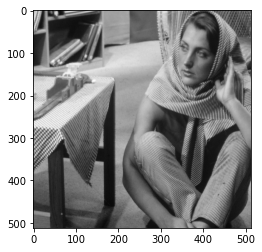

In [5]:
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [6]:
saida = conv2d(img,m) 
saida.shape

(514, 514)

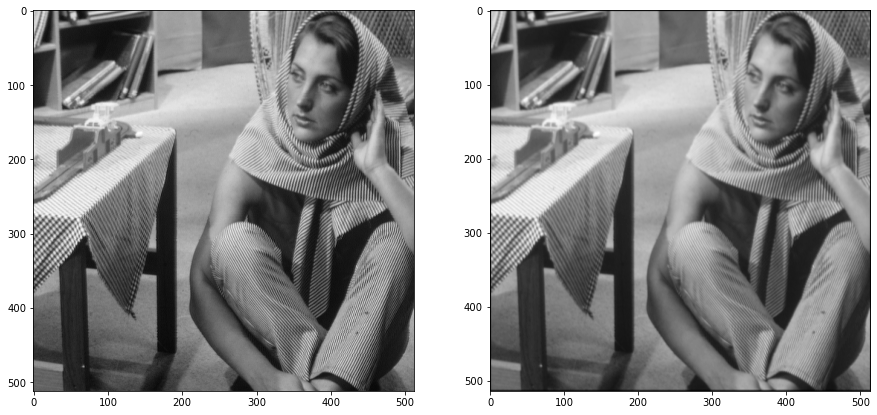

In [7]:
fig = plt.figure(figsize=(15,15))

plt.subplot(1,2,1)
plt.imshow(img, cmap=plt.get_cmap('gray'))

plt.subplot(1,2,2)
plt.imshow(saida, cmap=plt.get_cmap('gray'))

**3.** Utilize as seguintes matrizes como função de transferência do sistema e execute seu código para cada uma delas.

In [8]:
h1 = np.array([[1.96412803e-05, 1.76805171e-03, 1.96412803e-05], 
               [1.76805171e-03, 1.59154943e-01, 1.76805171e-03], 
               [1.96412803e-05, 1.76805171e-03, 1.96412803e-05]])

In [9]:
h2 = np.array([[1.96412803e-05, 5.74002351e-04, 1.76805171e-03, 5.74002351e-04, 1.96412803e-05], 
               [5.74002351e-04, 1.67748076e-02, 5.16700450e-02, 1.67748076e-02, 5.74002351e-04], 
               [1.76805171e-03, 5.16700450e-02, 1.59154943e-01, 5.16700450e-02, 1.76805171e-03], 
               [5.74002351e-04, 1.67748076e-02, 5.16700450e-02, 1.67748076e-02, 5.74002351e-04], 
               [1.96412803e-05, 5.74002351e-04, 1.76805171e-03, 5.74002351e-04, 1.96412803e-05]])

In [10]:
h3 = np.array([[1.96412803e-05, 2.39279779e-04, 1.07237757e-03, 1.76805171e-03, 1.07237757e-03, 2.39279779e-04, 1.96412803e-05],
               [2.39279779e-04, 2.91502447e-03, 1.30642333e-02, 2.15392793e-02, 1.30642333e-02, 2.91502447e-03, 2.39279779e-04],
               [1.07237757e-03, 1.30642333e-02, 5.85498315e-02, 9.65323526e-02, 5.85498315e-02, 1.30642333e-02, 1.07237757e-03],
               [1.76805171e-03, 2.15392793e-02, 9.65323526e-02, 1.59154943e-01, 9.65323526e-02, 2.15392793e-02, 1.76805171e-03],
               [1.07237757e-03, 1.30642333e-02, 5.85498315e-02, 9.65323526e-02, 5.85498315e-02, 1.30642333e-02, 1.07237757e-03],
               [2.39279779e-04, 2.91502447e-03, 1.30642333e-02, 2.15392793e-02, 1.30642333e-02, 2.91502447e-03, 2.39279779e-04],
               [1.96412803e-05, 2.39279779e-04, 1.07237757e-03, 1.76805171e-03, 1.07237757e-03, 2.39279779e-04, 1.96412803e-05]])

In [11]:
saida_h1 = conv2d(img,h1) 
print(saida_h1.shape)
saida_h2 = conv2d(img,h2) 
print(saida_h2.shape)
saida_h3 = conv2d(img,h3) 
print(saida_h3.shape)

(514, 514)
(516, 516)
(518, 518)


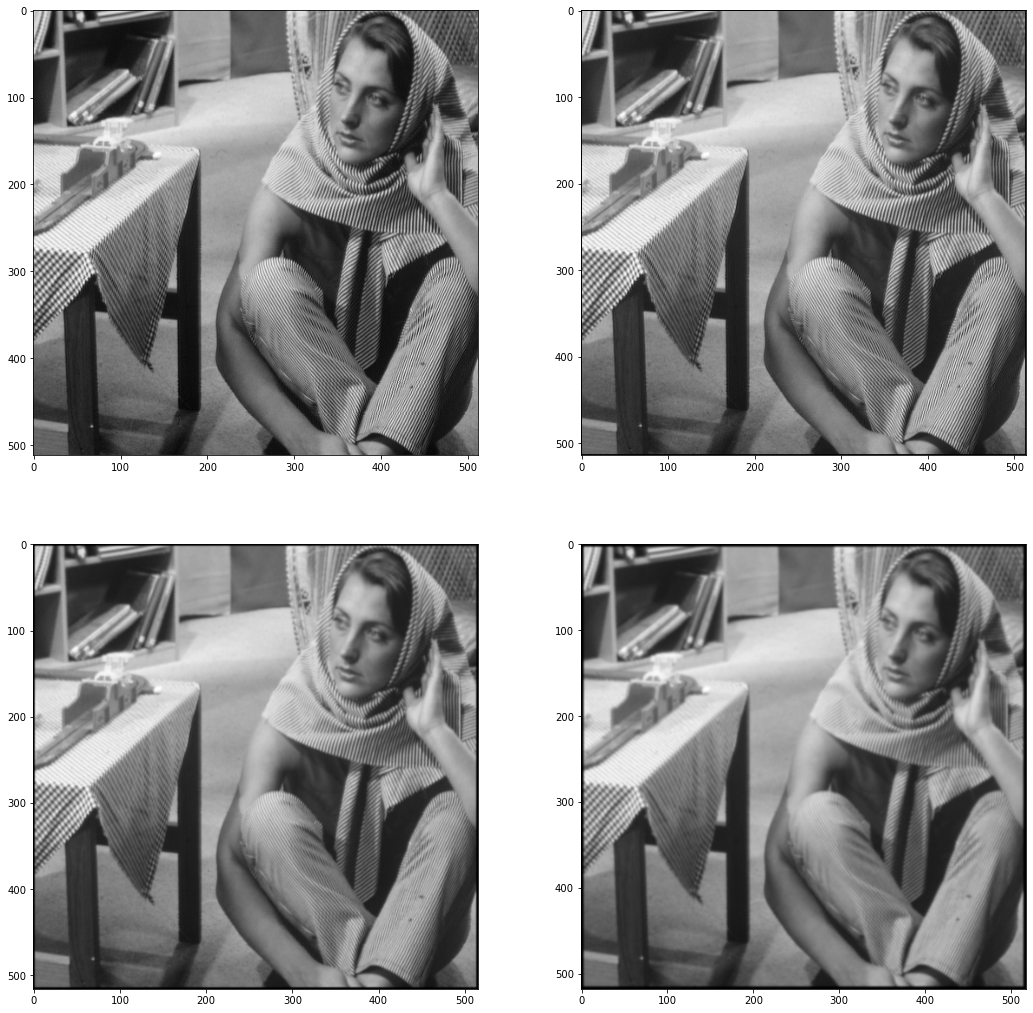

In [12]:
fig = plt.figure(figsize=(18,18))

plt.subplot(2,2,1) #original
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.subplot(2,2,2) #h1
plt.imshow(saida_h1, cmap=plt.get_cmap('gray'))
plt.subplot(2,2,3) #h2
plt.imshow(saida_h2, cmap=plt.get_cmap('gray'))
plt.subplot(2,2,4) #h3
plt.imshow(saida_h3, cmap=plt.get_cmap('gray'))

Após rodar seu código explique quais suas impressões sobre as imagens (processadas e não-processada), o que você achou de diferente e qual sua interpretação do processamento que o filtro faz.

Os valores sofrem alterações em sua magnitude , o que influencia na nitidez da imagem. No caso dos filtros h1,h2 e h3, percebemos que a imagem vai ficando mais borrada. Isso talvez se deva a soma dos próximas valores próximos da convolução. 